In [1]:
# Data Collection & Preprocessing
# Building the Symptom Prediction Model
# Training & Evaluating the Model

In [2]:
import sys
print(sys.executable)

/usr/local/bin/python3


## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
import urllib
import urllib.request
import seaborn as sns
import sklearn

# ML Libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Using RF instead of SVM
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from tkinter import *
from tkinter import messagebox


## Data Collection & Preprocessing

### 1. dataset.csv – contains symptom-disease mappings
### 2. Symptom-severity.csv – contain symptom severity scores
### 3. symptom_Description.csv – describe diseases and their symptoms
### 4. symptom_precaution.csv – provides precautions for diseases

In [4]:
symptom_disease_dataset = pd.read_csv('/Users/bhavnakumari/GitHub/Health_Diagnostic_System/Symptom-Analysis-Model/datasets/dataset.csv')
symptom_disease_dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
symptom_severity_dataset=pd.read_csv('/Users/bhavnakumari/GitHub/Health_Diagnostic_System/Symptom-Analysis-Model/datasets/Symptom-severity.csv')
symptom_severity_dataset.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


## Accessing Data

In [6]:
print("No of Rows of symptom_disease_dataset",symptom_disease_dataset.shape[0])
print("No of Columnsof symptom_disease_dataset",symptom_disease_dataset.shape[1])
symptom_disease_dataset.info()

No of Rows of symptom_disease_dataset 4920
No of Columnsof symptom_disease_dataset 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes:

## cleaning of data

In [7]:
symptom_disease_dataset.isna().sum()
symptom_disease_dataset.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [8]:
cols = symptom_disease_dataset.columns
print(cols)

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')


In [9]:
data = symptom_disease_dataset[cols].values.flatten()
print(data)

['Fungal infection' 'itching' ' skin_rash' ... nan nan nan]


In [10]:
s = pd.Series(data)
s = s.str.strip()
print(s)

0            Fungal infection
1                     itching
2                   skin_rash
3        nodal_skin_eruptions
4         dischromic _patches
                 ...         
88555                     NaN
88556                     NaN
88557                     NaN
88558                     NaN
88559                     NaN
Length: 88560, dtype: object


In [11]:
s = s.values.reshape(symptom_disease_dataset.shape)
print(s)

[['Fungal infection' 'itching' 'skin_rash' ... nan nan nan]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... nan nan nan]
 ['Fungal infection' 'itching' 'nodal_skin_eruptions' ... nan nan nan]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... nan nan nan]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... nan nan nan]
 ['Impetigo' 'skin_rash' 'high_fever' ... nan nan nan]]


In [12]:
symptom_disease_dataset = pd.DataFrame(s, columns=symptom_disease_dataset.columns)
symptom_disease_dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
symptom_disease_dataset = symptom_disease_dataset.fillna(0)
symptom_disease_dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Encoding the symptoms with their severity weight

In [14]:
symptom_severity_dataset.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [15]:
vals = symptom_disease_dataset.values
print(vals)
print("value length",len(vals))

[['Fungal infection' 'itching' 'skin_rash' ... 0 0 0]
 ['Fungal infection' 'skin_rash' 'nodal_skin_eruptions' ... 0 0 0]
 ['Fungal infection' 'itching' 'nodal_skin_eruptions' ... 0 0 0]
 ...
 ['Urinary tract infection' 'burning_micturition' 'bladder_discomfort'
  ... 0 0 0]
 ['Psoriasis' 'skin_rash' 'joint_pain' ... 0 0 0]
 ['Impetigo' 'skin_rash' 'high_fever' ... 0 0 0]]
value length 4920


In [16]:
symptoms = symptom_severity_dataset['Symptom'].unique()
print(symptoms)

['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_s

In [17]:
symptom_disease_dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
print(len(symptoms))

132


In [19]:
### replace the sympton with its corresponding weight

# like itching with 1

symptom_severity_dict = dict(zip(symptom_severity_dataset['Symptom'], symptom_severity_dataset['weight']))
print(symptom_severity_dict)

{'itching': 1, 'skin_rash': 3, 'nodal_skin_eruptions': 4, 'continuous_sneezing': 4, 'shivering': 5, 'chills': 3, 'joint_pain': 3, 'stomach_pain': 5, 'acidity': 3, 'ulcers_on_tongue': 4, 'muscle_wasting': 3, 'vomiting': 5, 'burning_micturition': 6, 'spotting_urination': 6, 'fatigue': 4, 'weight_gain': 3, 'anxiety': 4, 'cold_hands_and_feets': 5, 'mood_swings': 3, 'weight_loss': 3, 'restlessness': 5, 'lethargy': 2, 'patches_in_throat': 6, 'irregular_sugar_level': 5, 'cough': 4, 'high_fever': 7, 'sunken_eyes': 3, 'breathlessness': 4, 'sweating': 3, 'dehydration': 4, 'indigestion': 5, 'headache': 3, 'yellowish_skin': 3, 'dark_urine': 4, 'nausea': 5, 'loss_of_appetite': 4, 'pain_behind_the_eyes': 4, 'back_pain': 3, 'constipation': 4, 'abdominal_pain': 4, 'diarrhoea': 6, 'mild_fever': 5, 'yellow_urine': 4, 'yellowing_of_eyes': 4, 'acute_liver_failure': 6, 'fluid_overload': 4, 'swelling_of_stomach': 7, 'swelled_lymph_nodes': 6, 'malaise': 6, 'blurred_and_distorted_vision': 5, 'phlegm': 5, 'thr

In [20]:
symptom_list= list(symptom_severity_dict.keys())
print(symptom_list)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowe

In [21]:
#vals[:, 1:] → Selects all columns except the first one (which contains the disease name).
#symptom_severity_dict.get(x, 0) → Replaces symptoms with their severity scores. If a symptom is not found, it defaults to 0 (empty slots).
#np.vectorize() applies this function efficiently across all elements.

vals[:, 1:] = np.vectorize(lambda x: symptom_severity_dict.get(x, 0))(vals[:, 1:])

In [22]:
print(vals)

[['Fungal infection' 1 3 ... 0 0 0]
 ['Fungal infection' 3 4 ... 0 0 0]
 ['Fungal infection' 1 4 ... 0 0 0]
 ...
 ['Urinary tract infection' 6 4 ... 0 0 0]
 ['Psoriasis' 3 3 ... 0 0 0]
 ['Impetigo' 3 7 ... 0 0 0]]


In [23]:
d = pd.DataFrame(vals, columns=cols)

In [24]:
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Storing the diseases and encoded symptoms in seperate dataframes

In [25]:
(symptom_disease_dataset[cols] == 0).all()
symptom_disease_dataset['Disease'].value_counts()


Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

In [26]:
print(symptom_disease_dataset['Disease'].unique())

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [27]:
data = symptom_disease_dataset.iloc[:,1:].values
print(data)

[[1 3 4 ... 0 0 0]
 [3 4 0 ... 0 0 0]
 [1 4 0 ... 0 0 0]
 ...
 [6 4 0 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 7 4 ... 0 0 0]]


In [28]:
labels = symptom_disease_dataset['Disease'].values
print(labels)

['Fungal infection' 'Fungal infection' 'Fungal infection' ...
 'Urinary tract infection' 'Psoriasis' 'Impetigo']


## Splitting the data and training the model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [43]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [44]:
# Evaluate model
y_pred = model.predict(x_test)
print(y_pred)

['Acne' 'Acne' 'Hyperthyroidism' 'AIDS' 'Chronic cholestasis'
 'Hypertension' 'Hypoglycemia' 'Arthritis' 'Hepatitis B' 'Migraine'
 'Urinary tract infection' 'Diabetes' 'Hepatitis D' 'Psoriasis'
 'Alcoholic hepatitis' 'Alcoholic hepatitis'
 'Dimorphic hemmorhoids(piles)' 'Hepatitis E' 'Diabetes'
 'Cervical spondylosis' 'Bronchial Asthma' 'hepatitis A' 'Hepatitis B'
 'Bronchial Asthma' 'Allergy' 'Hepatitis C' 'Pneumonia' 'Migraine'
 'Hypothyroidism' 'Migraine' 'Chronic cholestasis' 'Hepatitis B'
 'Gastroenteritis' 'Hepatitis E' 'Varicose veins' 'Migraine' 'Jaundice'
 'Drug Reaction' 'Pneumonia' 'Urinary tract infection' 'Hepatitis C'
 '(vertigo) Paroymsal  Positional Vertigo' 'Hypertension' 'Diabetes'
 'Jaundice' 'Gastroenteritis' 'Hypoglycemia' 'Hepatitis B' 'Psoriasis'
 'Psoriasis' 'Heart attack' 'Tuberculosis' 'Varicose veins' 'Allergy'
 'Hyperthyroidism' 'Hepatitis C' 'Typhoid' 'Common Cold'
 'Urinary tract infection' 'Peptic ulcer diseae' 'Hypoglycemia'
 'Hyperthyroidism' 'Tuberculo

## Checking accuracy of the model

In [48]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


In [49]:
df_cm = pd.DataFrame(conf_mat, index=symptom_disease_dataset['Disease'].unique(), columns=symptom_disease_dataset['Disease'].unique())

In [50]:
print('F1-score% =', f1_score(y_test, y_pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, y_pred)*100)

F1-score% = 99.49254640376742 | Accuracy% = 99.49186991869918


<Axes: >

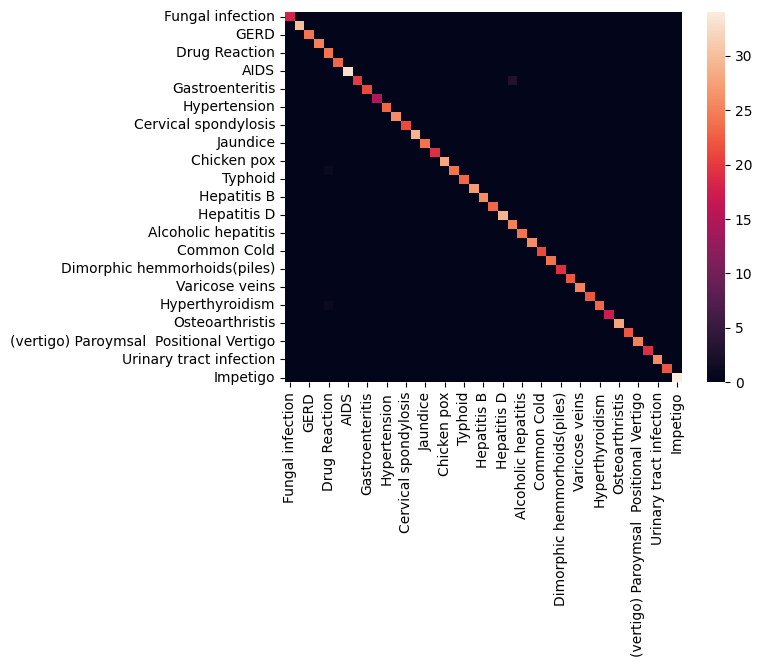

In [51]:
sns.heatmap(df_cm)

In [52]:
# Count occurrences of each disease
disease_counts = dataset['Disease'].value_counts()
print(disease_counts)

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

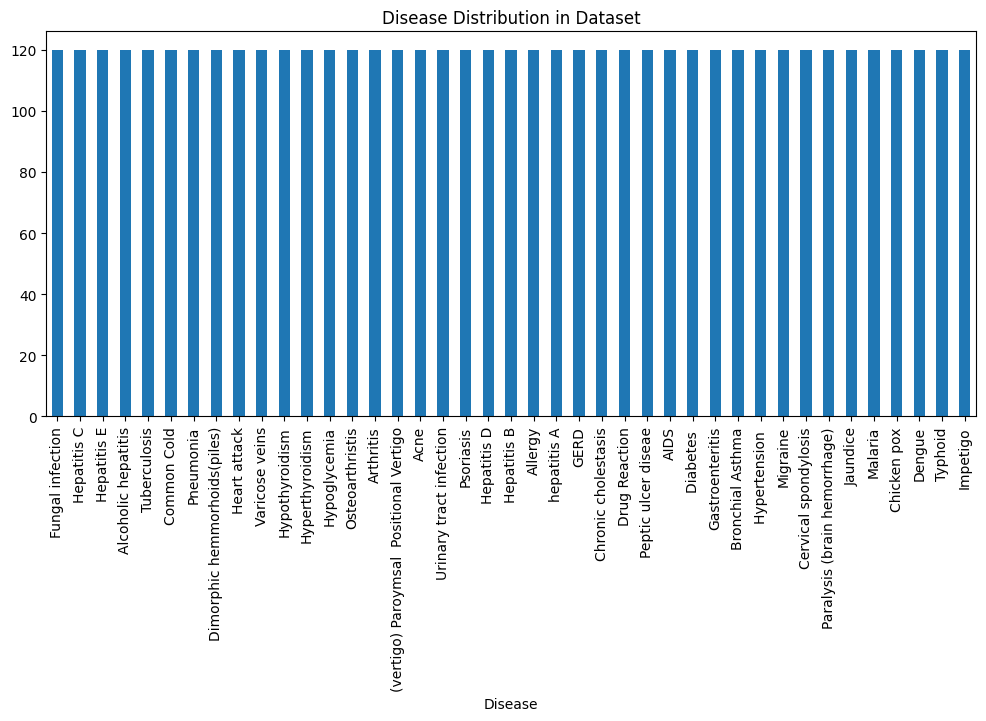

In [53]:
# Visualize
import matplotlib.pyplot as plt
disease_counts.plot(kind='bar', figsize=(12,5), title="Disease Distribution in Dataset")
plt.show()

## saving the trained model

In [54]:
import joblib
joblib.dump(model, "symptom_disease_model.pkl")  # Save the trained model

['symptom_disease_model.pkl']